# Seeding the environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [2]:
# Set seed value
seed_value = 56
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread
from sklearn.preprocessing import MinMaxScaler

# Importing data

In [4]:
dir = '/home/DibyenduBSeal/DBS_HPC/scRNAseqTimeSeries/'

In [5]:
X = mmread(dir+'Data/E-MTAB-7606/E-MTAB-7606.aggregated_filtered_normalised_counts.mtx')
X

<14162x209 sparse matrix of type '<class 'numpy.float64'>'
	with 345731 stored elements in COOrdinate format>

In [6]:
sparsity=34573100/(14162*209)
sparsity

11.680661707419748

# Pre-processing

Converting sparse matrix into dense

In [7]:
X_arr = X.toarray()
X_arr

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.7104279, ..., 0.       , 0.       ,
        5.4015794],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [8]:
X_arr.shape

(14162, 209)

In [9]:
pd.DataFrame(X_arr).describe()

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
count,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,...,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000,14162.000000
mean,70.611489,70.611498,70.611493,70.611497,70.611501,70.611497,70.611500,70.611496,70.611497,70.611499,...,70.611494,70.611501,70.611488,70.611494,70.611498,70.611495,70.611491,70.611486,70.611498,70.611501
std,4744.890451,2894.741937,3518.732531,3508.123727,2922.907360,3273.435815,2111.971493,3685.592832,3868.485084,3125.603025,...,1778.705686,2187.270133,3268.808364,2920.830656,3104.513272,2515.790768,2303.969464,5156.084937,1616.639463,2486.489006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.259066,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,563922.800000,341937.500000,417359.780000,415125.940000,343945.220000,387831.280000,241301.620000,436680.840000,459208.440000,370097.060000,...,202379.860000,255374.200000,386882.440000,344730.440000,367201.780000,293537.030000,269465.160000,613107.100000,183258.280000,291504.340000


Scaling

In [10]:
scaler = MinMaxScaler()
X_arr1=scaler.fit_transform(X_arr.T)
data = pd.DataFrame(X_arr1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14152,14153,14154,14155,14156,14157,14158,14159,14160,14161
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.179058,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.243321,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.068223,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.238021,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.032667,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Extracting row names and column names

In [11]:
row_names = pd.read_csv(dir+'Data/E-MTAB-7606/E-MTAB-7606.aggregated_filtered_normalised_counts_rows.csv',header=None)
col_names = pd.read_csv(dir+'Data/E-MTAB-7606/E-MTAB-7606.aggregated_filtered_normalised_counts_cols.csv',header=None)

print(row_names.head())
print(col_names.head())

              0
0  SAMEA5215575
1  SAMEA5215576
2  SAMEA5215577
3  SAMEA5215578
4  SAMEA5215579
                 0
0  ENSG00000000003
1  ENSG00000000419
2  ENSG00000000457
3  ENSG00000000460
4  ENSG00000000938


In [12]:
data.columns=list(col_names[0])
data.index=list(row_names[0])

data.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000287846,ENSG00000287856,ENSG00000287924,ENSG00000287977,ENSG00000288218,ENSG00000288258,ENSG00000288380,ENSG00000288525,ENSG00000288534,ENSG00000288579
SAMEA5215575,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.179058,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
SAMEA5215576,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.243321,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
SAMEA5215577,0.0,0.0,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.068223,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
SAMEA5215578,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.238021,0.0,0.0,0.0,0.0,0.0,0.0
SAMEA5215579,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.032667,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Removing lowly expressed genes

In [13]:
tr_data = data.T

In [14]:
#Sample Example Check
for i in tr_data.loc['ENSG00000000003']:
  if i>0:
    print(i)

0.2549308075756339
0.18887653618178296
0.1791823570331146
0.17141952297643362
1.0


In [15]:
length=[]
for i in tr_data.index:
  gen_val=[]
  for j in tr_data.loc[i]:
    if j>0:
      gen_val.append(j)
  length.append(len(gen_val))

In [16]:
amount = [i/tr_data.shape[1] for i in length]

In [17]:
pd.DataFrame(amount).describe()

,0
count,14162.000000
mean,0.116796
std,0.142828
min,0.014354
25%,0.033493
50%,0.071770
75%,0.138756
max,0.995215


In [18]:
df=pd.DataFrame(data=zip(tr_data.index,amount))
df.head()

,0,1
0,ENSG00000000003,0.023923
1,ENSG00000000419,0.143541
2,ENSG00000000457,0.344498
3,ENSG00000000460,0.129187
4,ENSG00000000938,0.019139


In [19]:
assay=[]
cnt=[]
for i in range(len(df[1])):
  if df[1][i] > df[1].quantile(0.25):
    assay.append(df[0][i])
    cnt.append(df[1][i])

In [20]:
len(assay)

10386

In [21]:
work_data = tr_data.loc[assay]
work_data

,SAMEA5215575,SAMEA5215576,SAMEA5215577,SAMEA5215578,SAMEA5215579,SAMEA5215580,SAMEA5215581,SAMEA5215582,SAMEA5215583,SAMEA5215584,...,SAMEA5215775,SAMEA5215776,SAMEA5215777,SAMEA5215778,SAMEA5215779,SAMEA5215780,SAMEA5215781,SAMEA5215782,SAMEA5215783,SAMEA5215784
ENSG00000000419,0.000000,0.000000,0.000000,0.000000,0.000000,0.433432,0.005724,0.0,0.19085,0.000000,...,0.057303,0.012095,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
ENSG00000000457,0.000000,0.000000,0.002232,0.000000,0.000000,0.002883,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.003055,0.002838,0.0,0.0,0.000000,0.007048
ENSG00000000460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011174,0.0,0.00000,0.449307,...,0.000000,0.009445,0.0,0.0,0.000000,0.000000,0.0,0.0,0.003774,0.000000
ENSG00000001084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
ENSG00000001460,0.179058,0.000000,0.068223,0.000000,0.032667,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286905,0.000000,0.096603,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
ENSG00000287067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.055589,0.0,0.0,0.000000,0.000000
ENSG00000287977,0.000000,0.000000,0.000000,0.238021,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
ENSG00000288534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Metadata

In [22]:
exp_data = pd.read_csv(dir+'Data/E-MTAB-7606/ExpDesign-E-MTAB-7606.tsv', delimiter="\t")
exp_data.head()

,Assay,Sample Characteristic[organism],Sample Characteristic[age],Sample Characteristic[sex],Sample Characteristic[organism part],Sample Characteristic[cell type],Sample Characteristic[phenotype],Sample Characteristic[individual],Sample Characteristic[developmental stage],Factor Value[infect],Factor Value[time],Factor Value[phenotype],Factor Value[single cell identifier]
0,SAMEA5215575,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,A2/BHA 543 tetramer positive,KK51-14-HAP03A09_S27
1,SAMEA5215576,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,A2/BHA 543 tetramer positive,KK51-14-HAP04A04_S17
2,SAMEA5215577,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,A2/BHA 543 tetramer positive,KK51-14-HAP04B08_S18
3,SAMEA5215578,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,A2/BHA 543 tetramer positive,KK51-14-HAP04C02_S34
4,SAMEA5215579,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,A2/BHA 543 tetramer positive,KK51-14-HAP04C03_S5


In [23]:
exp_data.drop(columns='Factor Value[phenotype]',axis=1,inplace=True)
exp_data.head()

,Assay,Sample Characteristic[organism],Sample Characteristic[age],Sample Characteristic[sex],Sample Characteristic[organism part],Sample Characteristic[cell type],Sample Characteristic[phenotype],Sample Characteristic[individual],Sample Characteristic[developmental stage],Factor Value[infect],Factor Value[time],Factor Value[single cell identifier]
0,SAMEA5215575,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP03A09_S27
1,SAMEA5215576,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP04A04_S17
2,SAMEA5215577,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP04B08_S18
3,SAMEA5215578,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP04C02_S34
4,SAMEA5215579,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP04C03_S5


Dropping the assay "SAMEA5215593"

In [24]:
exp_data.drop(labels=18,axis=0,inplace=True)
len(exp_data)

209

Renaming column names

In [25]:
exp_data.columns = ['Assay','Organism','Age','Sex','Organism Part','Cell Type','Phenotype','Individual','Developmental Stage','Infect','Time','Single Cell Identifier']
exp_data.head()

,Assay,Organism,Age,Sex,Organism Part,Cell Type,Phenotype,Individual,Developmental Stage,Infect,Time,Single Cell Identifier
0,SAMEA5215575,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP03A09_S27
1,SAMEA5215576,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP04A04_S17
2,SAMEA5215577,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP04B08_S18
3,SAMEA5215578,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP04C02_S34
4,SAMEA5215579,Homo sapiens,31 year,male,blood,"CD8-positive, alpha-beta T cell",A2/BHA 543 tetramer positive,KK51,adult,Influenza B virus,14 day,KK51-14-HAP04C03_S5


In [26]:
exp_data['Time'].value_counts()

1.5 year    66
14 day      66
3 month     15
Name: Time, dtype: int64

Working data with Genes as rows and Time as columns

In [27]:
work_data.columns=exp_data.Time
work_data.head()

Time,14 day,14 day,14 day,14 day,14 day,14 day,14 day,14 day,14 day,14 day,...,14 day,14 day,14 day,14 day,14 day,14 day,14 day,14 day,14 day,14 day
ENSG00000000419,0.000000,0.0,0.000000,0.0,0.000000,0.433432,0.005724,0.0,0.19085,0.000000,...,0.057303,0.012095,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
ENSG00000000457,0.000000,0.0,0.002232,0.0,0.000000,0.002883,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.003055,0.002838,0.0,0.0,0.000000,0.007048
ENSG00000000460,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.011174,0.0,0.00000,0.449307,...,0.000000,0.009445,0.0,0.0,0.000000,0.000000,0.0,0.0,0.003774,0.000000
ENSG00000001084,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
ENSG00000001460,0.179058,0.0,0.068223,0.0,0.032667,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Checking for Trend-Seasonality

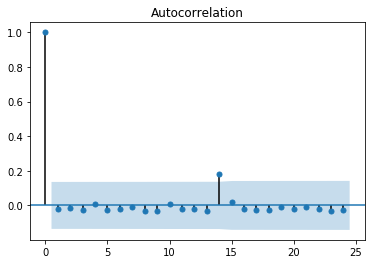

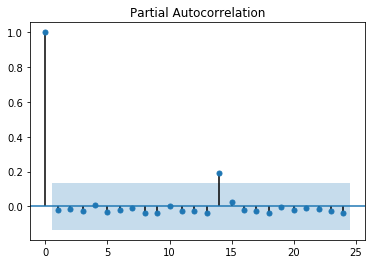

In [28]:
#%%script false
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(work_data.iloc[100])
plot_pacf(work_data.iloc[100])
pyplot.show()

Extracting control data

In [29]:
control_data = work_data.drop(['14 day','1.5 year','3 month'],axis=1)
control_data.columns=['Control' for i in range(len(control_data.columns))]
control_data.head()

,Control,Control,Control,Control,Control,Control,Control,Control,Control,Control,...,Control,Control,Control,Control,Control,Control,Control,Control,Control,Control
ENSG00000000419,0.0,0.002642,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.421985,0.0,0.0,0.000000,0.034608,0.0,0.0,0.000000,0.0
ENSG00000000457,0.0,0.005155,0.004443,0.00000,0.0,0.000000,0.00000,0.0,0.002648,0.0,...,0.0,0.000000,0.0,0.0,0.001721,0.000000,0.0,0.0,0.002998,0.0
ENSG00000000460,0.0,0.000000,0.000000,0.01764,0.0,0.073995,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
ENSG00000001084,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
ENSG00000001460,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.03484,0.0,0.000000,0.0,...,0.0,0.044574,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [30]:
X_data = pd.concat([control_data,work_data[['14 day','3 month']]],axis=1)

In [31]:
X_data.head()

,Control,Control,Control,Control,Control,Control,Control,Control,Control,Control,...,3 month,3 month,3 month,3 month,3 month,3 month,3 month,3 month,3 month,3 month
ENSG00000000419,0.0,0.002642,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.0,0.000000,0.0
ENSG00000000457,0.0,0.005155,0.004443,0.00000,0.0,0.000000,0.00000,0.0,0.002648,0.0,...,0.001855,0.005152,0.003880,0.000000,0.00456,0.0,0.00000,0.0,0.000000,0.0
ENSG00000000460,0.0,0.000000,0.000000,0.01764,0.0,0.073995,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.005315,0.000000,0.00000,0.0,0.00000,0.0,0.000000,0.0
ENSG00000001084,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.0,0.000000,0.0
ENSG00000001460,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.03484,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.038445,0.00000,0.0,0.27396,0.0,0.549253,0.0


In [32]:
y_data = work_data['1.5 year']
y_data.head()

Time,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,...,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year,1.5 year
ENSG00000000419,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.653975,0.0,0.0,...,0.612043,0.0000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
ENSG00000000457,0.000000,0.0,0.0,0.003356,0.0,0.002662,0.0,0.000000,0.0,0.0,...,0.000000,0.0021,0.0,0.00000,0.0,0.002882,0.0,0.0,0.0,0.003906
ENSG00000000460,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.042184,1.0,0.0,...,0.000000,0.0000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
ENSG00000001084,0.626635,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
ENSG00000001460,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0000,0.0,0.02229,0.0,0.034453,0.0,0.0,0.0,0.017486


In [33]:
print(np.shape(X_data))
print(np.shape(y_data))

(10386, 143)
(10386, 66)


# DNN regressor

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import keras
from keras.utils.vis_utils import plot_model
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics.pairwise import euclidean_distances

In [35]:
tf.keras.backend.set_floatx('float64')

**Finding the best seed**

In [36]:
def MLP1(x_shape,y_shape):
    model = Sequential()
    model.add(Dense(130, input_dim=x_shape, kernel_initializer='uniform', activation="relu"))
    model.add(Dense(75, kernel_initializer='uniform', activation="relu"))
    model.add(Dense(y_shape, kernel_initializer='uniform', activation="linear"))
    model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])
    return model

In [37]:
rnd_state,r2scores,msescores,maescores,pearsoncorr = [],[],[],[],[]
for i in np.random.randint(1,101,20):
    print('\nSeed = {}'.format(i))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=i)
    model = MLP1(np.shape(X_train)[1],np.shape(y_train)[1])
    model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=16, validation_split=0.2, shuffle=True)
    y_pred = model.predict(np.array(X_test))
    
    #results
    rnd_state.append(i)
    
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores.append(r2_score(actual_mean, pred_mean))
    msescores.append(mean_squared_error(np.array(y_test), y_pred))
    maescores.append(mean_absolute_error(np.array(y_test), y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Seed = 86
Epoch 1/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 2/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 3/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 4/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 5/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 6/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 7/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 8/10
416/416 [==============================] - 1s 3ms/step

In [38]:
result = pd.DataFrame(zip(rnd_state,r2scores,msescores,maescores,pearsoncorr))
result.columns = ['Seed','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(rnd_state)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(rnd_state):'avg'},inplace=True)
result

,Seed,R2Score,MSE,MAE,Correlation Coeff.
0,86.0,0.531851,0.013242,0.045483,0.532838
1,16.0,0.654590,0.013372,0.043334,0.676038
2,65.0,0.544518,0.013446,0.046218,0.548951
3,35.0,0.588611,0.013478,0.045293,0.618095
4,15.0,0.534632,0.013416,0.046059,0.596124
5,88.0,0.545778,0.012956,0.044691,0.609377
6,23.0,0.511565,0.013538,0.048859,0.602038
7,58.0,0.434182,0.013483,0.045795,0.525353
8,91.0,0.571390,0.013413,0.045497,0.602705
9,56.0,0.645687,0.013031,0.045276,0.637324


In [39]:
result.to_csv(dir+'Results/EMTAB7606/DNN_bestSeed.csv')

Extracting results with repeated runs

**DNN with no dropout**

In [40]:
run,r2scores,msescores,maescores,pearsoncorr = [],[],[],[],[]
for i in range(10):
    print('\nRun = {}'.format(i+1))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=16)
    model = MLP1(np.shape(X_train)[1],np.shape(y_train)[1])
    model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=16, validation_split=0.2, shuffle=True)
    y_pred = model.predict(np.array(X_test))
    
    #results
    run.append(i+1)
    
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores.append(r2_score(actual_mean, pred_mean))
    msescores.append(mean_squared_error(np.array(y_test), y_pred))
    maescores.append(mean_absolute_error(np.array(y_test), y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Run = 1
Epoch 1/10
416/416 [==============================] - 3s 5ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 2/10
416/416 [==============================] - 2s 5ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 3/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 4/10
416/416 [==============================] - 2s 5ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 5/10
416/416 [==============================] - 2s 5ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 6/10
416/416 [==============================] - 2s 4ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 7/10
416/416 [==============================] - 2s 5ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 8/10
416/416 [==============================] - 2s 5ms/step -

In [41]:
result = pd.DataFrame(zip(run,r2scores,msescores,maescores,pearsoncorr))
result.columns = ['#Run','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(run)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(run):'avg'},inplace=True)
result

,#Run,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.658248,0.013355,0.045400,0.699071
1,2.0,0.654771,0.013384,0.043674,0.674721
2,3.0,0.643683,0.013428,0.045500,0.692920
3,4.0,0.639410,0.013435,0.046342,0.684709
4,5.0,0.671129,0.013331,0.046584,0.701345
5,6.0,0.664399,0.013354,0.044198,0.692056
6,7.0,0.678102,0.013331,0.044698,0.695824
7,8.0,0.647746,0.013380,0.043714,0.680988
8,9.0,0.639543,0.013417,0.047182,0.688590
9,10.0,0.685486,0.013293,0.046760,0.693668


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 130)               18720     
                                                                 
 dense_88 (Dense)            (None, 75)                9825      
                                                                 
 dense_89 (Dense)            (None, 66)                5016      
                                                                 
Total params: 33,561
Trainable params: 33,561
Non-trainable params: 0
_________________________________________________________________


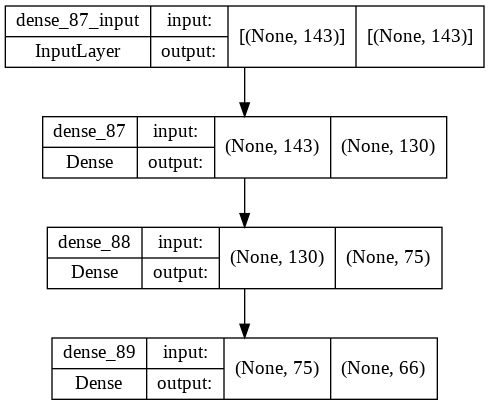

In [42]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [43]:
result.to_csv(dir+'Results/EMTAB7606/DNN_noDropout_10runs.csv')

**DNN with 10% dropout all all layers**

In [44]:
def MLP2(x_shape,y_shape,rnd):
    model = Sequential()
    model.add(Dropout(0.1,seed=rnd))
    model.add(Dense(130, input_dim=x_shape, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.1,seed=rnd))
    model.add(Dense(75, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.1,seed=rnd))
    model.add(Dense(y_shape, kernel_initializer='uniform', activation="linear"))
    model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])
    return model

In [45]:
run,r2scores,msescores,maescores,pearsoncorr = [],[],[],[],[]
for i in range(10):
    print('\nRun = {}'.format(i+1))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=16)
    model = MLP2(np.shape(X_train)[1],np.shape(y_train)[1],16)
    model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=16, validation_split=0.2, shuffle=True)
    y_pred = model.predict(np.array(X_test))
    
    #results
    run.append(i+1)
    
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores.append(r2_score(actual_mean, pred_mean))
    msescores.append(mean_squared_error(np.array(y_test), y_pred))
    maescores.append(mean_absolute_error(np.array(y_test), y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Run = 1
Epoch 1/10
416/416 [==============================] - 2s 3ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 2/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 3/10
416/416 [==============================] - 1s 2ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 4/10
416/416 [==============================] - 1s 2ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 5/10
416/416 [==============================] - 1s 2ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 6/10
416/416 [==============================] - 1s 2ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 7/10
416/416 [==============================] - 1s 2ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 8/10
416/416 [==============================] - 1s 2ms/step -

In [46]:
result = pd.DataFrame(zip(run,r2scores,msescores,maescores,pearsoncorr))
result.columns = ['#Run','R2Score','MSE','MAE', 'Correlation Coeff.']
result.loc[len(run)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(run):'avg'},inplace=True)
result

,#Run,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.684423,0.013254,0.045950,0.695382
1,2.0,0.660864,0.013298,0.046047,0.687590
2,3.0,0.625262,0.013381,0.047205,0.683113
3,4.0,0.684754,0.013256,0.046328,0.692560
4,5.0,0.692972,0.013249,0.046704,0.700950
5,6.0,0.683927,0.013250,0.046220,0.695313
6,7.0,0.692177,0.013239,0.047312,0.705137
7,8.0,0.684794,0.013268,0.046858,0.700424
8,9.0,0.670181,0.013286,0.046796,0.692998
9,10.0,0.669955,0.013292,0.045688,0.697035


In [47]:
result.to_csv(dir+'Results/EMTAB7606/DNN_10PercentDropout_10runs.csv')

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_27 (Dropout)        (None, 143)               0         
                                                                 
 dense_117 (Dense)           (None, 130)               18720     
                                                                 
 dropout_28 (Dropout)        (None, 130)               0         
                                                                 
 dense_118 (Dense)           (None, 75)                9825      
                                                                 
 dropout_29 (Dropout)        (None, 75)                0         
                                                                 
 dense_119 (Dense)           (None, 66)                5016      
                                                                 
Total params: 33,561
Trainable params: 33,561
Non-tra

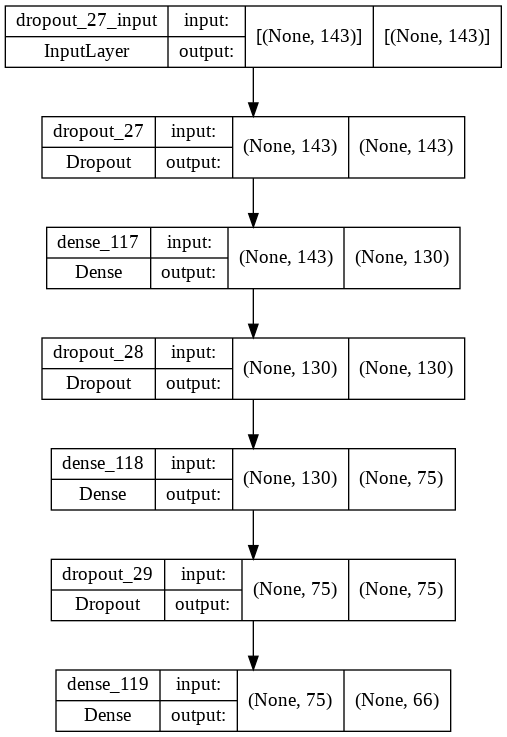

In [48]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

**DNN with 10% dropout at input layer and 20% dropout at hidden layers**

In [49]:
def MLP3(x_shape,y_shape,rnd):
    model = Sequential()
    model.add(Dropout(0.1,seed=rnd))
    model.add(Dense(130, input_dim=x_shape, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.2,seed=rnd))
    model.add(Dense(75, kernel_initializer='uniform', activation="relu"))
    model.add(Dropout(0.2,seed=rnd))
    model.add(Dense(y_shape, kernel_initializer='uniform', activation="linear"))
    model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse'])
    return model

In [50]:
run,r2scores,msescores,maescores,pearsoncorr = [],[],[],[],[]
for i in range(10):
    print('\nRun = {}'.format(i+1))
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=16)
    model = MLP3(np.shape(X_train)[1],np.shape(y_train)[1],16)
    model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=16, validation_split=0.2, shuffle=True)
    y_pred = model.predict(np.array(X_test))
    
    #results
    run.append(i)
    
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores.append(r2_score(actual_mean, pred_mean))
    msescores.append(mean_squared_error(np.array(y_test), y_pred))
    maescores.append(mean_absolute_error(np.array(y_test), y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)


Run = 1
Epoch 1/10
416/416 [==============================] - 2s 3ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 2/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 3/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 4/10
416/416 [==============================] - 1s 3ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 5/10
416/416 [==============================] - 1s 2ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 6/10
416/416 [==============================] - 1s 2ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 7/10
416/416 [==============================] - 1s 2ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 8/10
416/416 [==============================] - 1s 2ms/step -

In [51]:
result = pd.DataFrame(zip(run,r2scores,msescores,maescores,pearsoncorr))
result.columns = ['#Run','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(run)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(run):'avg'},inplace=True)
result

,#Run,R2Score,MSE,MAE,Correlation Coeff.
0,0.0,0.694834,0.013232,0.045610,0.695200
1,1.0,0.675348,0.013269,0.046012,0.680798
2,2.0,0.680776,0.013265,0.045308,0.695753
3,3.0,0.693657,0.013227,0.045726,0.700665
4,4.0,0.667418,0.013287,0.046609,0.699576
5,5.0,0.693952,0.013235,0.045754,0.695241
6,6.0,0.671211,0.013288,0.046087,0.698546
7,7.0,0.640107,0.013345,0.046549,0.691400
8,8.0,0.683758,0.013248,0.044720,0.691739
9,9.0,0.673826,0.013272,0.045921,0.682522


In [52]:
result.to_csv(dir+'Results/EMTAB7606/DNN_10Percent20PercentDropout_10runs.csv')

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_57 (Dropout)        (None, 143)               0         
                                                                 
 dense_147 (Dense)           (None, 130)               18720     
                                                                 
 dropout_58 (Dropout)        (None, 130)               0         
                                                                 
 dense_148 (Dense)           (None, 75)                9825      
                                                                 
 dropout_59 (Dropout)        (None, 75)                0         
                                                                 
 dense_149 (Dense)           (None, 66)                5016      
                                                                 
Total params: 33,561
Trainable params: 33,561
Non-tra

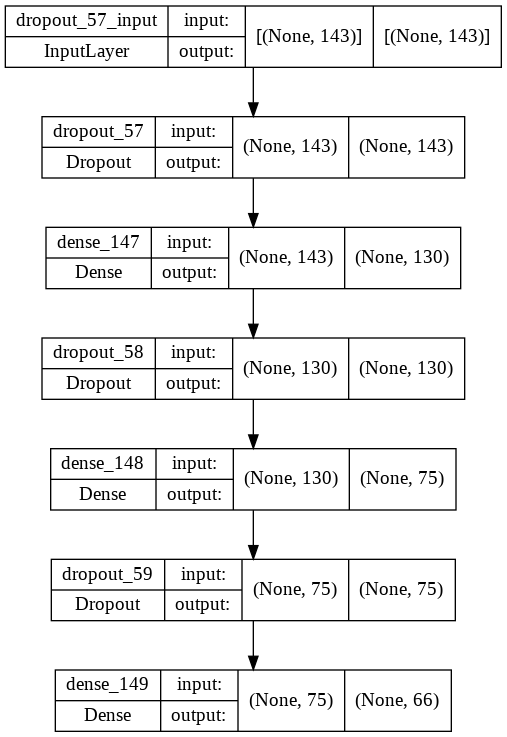

In [53]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

# Benchmarking

In [54]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Linear Regression

In [56]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

run,r2scores_lr,msescores_lr,maescores_lr,pearsoncorr = [],[],[],[],[]

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=16)
    linear_Regr = LinearRegression(normalize=True)
    linear_Regr.fit(X_train, y_train)
    y_pred = linear_Regr.predict(X_test)
    
    run.append(i+1)
    actual_mean = pd.DataFrame(y_test.mean(axis=1))
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    r2scores_lr.append(r2_score(actual_mean, pred_mean))
    msescores_lr.append(mean_squared_error(y_test, y_pred))
    maescores_lr.append(mean_absolute_error(y_test, y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

In [57]:
result = pd.DataFrame(zip(run,r2scores_lr,msescores_lr,maescores_lr,pearsoncorr))
result.columns = ['#Run','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(run)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(run):'avg'},inplace=True)
result

,#Run,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.556212,0.013722,0.047631,0.638879
1,2.0,0.556212,0.013722,0.047631,0.638879
2,3.0,0.556212,0.013722,0.047631,0.638879
3,4.0,0.556212,0.013722,0.047631,0.638879
4,5.0,0.556212,0.013722,0.047631,0.638879
5,6.0,0.556212,0.013722,0.047631,0.638879
6,7.0,0.556212,0.013722,0.047631,0.638879
7,8.0,0.556212,0.013722,0.047631,0.638879
8,9.0,0.556212,0.013722,0.047631,0.638879
9,10.0,0.556212,0.013722,0.047631,0.638879


In [58]:
result.to_csv(dir+'Results/EMTAB7606/LinearRegression_10runs.csv')

# Lasso

In [59]:
from sklearn.linear_model import Lasso

alpha,ls_r2,ls_mse,ls_mae,pearsoncorr = [],[],[],[],[]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=16)
actual_mean = pd.DataFrame(y_test.mean(axis=1))

#for alp in [0.01,0.05,0.1,0.2,0.5,1,2,2.5,5,10]:
for alp in [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]:
    print('Working with alpha =',alp)
    Lasso_Regr = Lasso(alpha=alp, normalize=True)
    Lasso_Regr.fit(X_train,y_train)
    y_pred = Lasso_Regr.predict(X_test)
    
    alpha.append(alp)
    
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    ls_r2.append(r2_score(actual_mean, pred_mean))
    ls_mse.append(mean_squared_error(y_test, y_pred))
    ls_mae.append(mean_absolute_error(y_test, y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

Working with alpha = 1e-05
Working with alpha = 5e-05
Working with alpha = 0.0001
Working with alpha = 0.0005


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.001


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.005


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.01


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.05


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.1


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Working with alpha = 0.5


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [60]:
result = pd.DataFrame(zip(alpha,ls_r2,ls_mse,ls_mae,pearsoncorr))
result.columns = ['Alpha','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(alpha)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(alpha):'avg'},inplace=True)
result

,Alpha,R2Score,MSE,MAE,Correlation Coeff.
0,0.000010,0.547076,0.013631,0.047034,0.633291
1,0.000050,0.410086,0.013860,0.048876,0.637886
2,0.000100,0.172365,0.014328,0.050911,0.584811
3,0.000500,-0.001081,0.014704,0.052136,NaN
4,0.001000,-0.001081,0.014704,0.052136,NaN
5,0.005000,-0.001081,0.014704,0.052136,NaN
6,0.010000,-0.001081,0.014704,0.052136,NaN
7,0.050000,-0.001081,0.014704,0.052136,NaN
8,0.100000,-0.001081,0.014704,0.052136,NaN
9,0.500000,-0.001081,0.014704,0.052136,NaN


In [61]:
result.to_csv(dir+'Results/EMTAB7606/LassoRegression_10runs.csv')

# Ridge

In [62]:
from sklearn.linear_model import Ridge

alpha,rg_r2,rg_mse,rg_mae,pearsoncorr = [],[],[],[],[]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=16)
actual_mean = pd.DataFrame(y_test.mean(axis=1))

for alp in [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]:
    print('Working with alpha = ',alp)
    Ridge_Regr = Ridge(alpha=alp, normalize=True)
    Ridge_Regr.fit(X_train, y_train)
    y_pred = Ridge_Regr.predict(X_test)
    
    alpha.append(alp)
    
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    rg_r2.append(r2_score(actual_mean, pred_mean))
    rg_mse.append(mean_squared_error(y_test, y_pred))
    rg_mae.append(mean_absolute_error(y_test, y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

Working with alpha =  1e-05
Working with alpha =  5e-05
Working with alpha =  0.0001
Working with alpha =  0.0005
Working with alpha =  0.001
Working with alpha =  0.005
Working with alpha =  0.01
Working with alpha =  0.05
Working with alpha =  0.1
Working with alpha =  0.5


In [63]:
result = pd.DataFrame(zip(alpha,rg_r2,rg_mse,rg_mae,pearsoncorr))
result.columns = ['Alpha','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(alpha)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(alpha):'avg'},inplace=True)
result

,Alpha,R2Score,MSE,MAE,Correlation Coeff.
0,0.000010,0.556212,0.013722,0.047631,0.638878
1,0.000050,0.556212,0.013722,0.047631,0.638878
2,0.000100,0.556212,0.013722,0.047631,0.638877
3,0.000500,0.556213,0.013722,0.047630,0.638872
4,0.001000,0.556214,0.013721,0.047628,0.638866
5,0.005000,0.556221,0.013719,0.047614,0.638814
6,0.010000,0.556228,0.013717,0.047596,0.638750
7,0.050000,0.556188,0.013699,0.047473,0.638233
8,0.100000,0.555934,0.013680,0.047350,0.637589
9,0.500000,0.549376,0.013609,0.047015,0.632919


In [64]:
result.to_csv(dir+'Results/EMTAB7606/RidgeRegression_10runs.csv')

# k-NN

In [65]:
from sklearn.neighbors import KNeighborsRegressor

knn,knn_r2,knn_mse,knn_mae=[],[],[],[]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=16)
actual_mean = pd.DataFrame(y_test.mean(axis=1))

for k in [1,5,9,11,15,19,21,25,29,31]:
    print('k=',k)
    knn_Regr = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    knn_Regr.fit(X_train, y_train)
    y_pred = knn_Regr.predict(X_test)
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    knn.append(k)
    knn_r2.append(r2_score(actual_mean, pred_mean))
    knn_mse.append(mean_squared_error(y_test, y_pred))
    knn_mae.append(mean_absolute_error(y_test, y_pred))

    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

k= 1
k= 5
k= 9
k= 11
k= 15
k= 19
k= 21
k= 25
k= 29
k= 31


In [66]:
result = pd.DataFrame(zip(knn,knn_r2,knn_mse,knn_mae,pearsoncorr))
result.columns = ['k','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(knn)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(knn):'avg'},inplace=True)
result

,k,R2Score,MSE,MAE,Correlation Coeff.
0,1.0,0.384715,0.021957,0.041695,0.638878
1,5.0,0.578562,0.014969,0.039650,0.638878
2,9.0,0.594137,0.014267,0.039948,0.638877
3,11.0,0.605558,0.014117,0.040292,0.638872
4,15.0,0.609513,0.013942,0.040930,0.638866
5,19.0,0.610651,0.013855,0.041709,0.638814
6,21.0,0.616576,0.013811,0.041992,0.638750
7,25.0,0.620453,0.013744,0.042578,0.638233
8,29.0,0.618618,0.013715,0.043194,0.637589
9,31.0,0.617953,0.013699,0.043449,0.632919


In [67]:
result.to_csv(dir+'Results/EMTAB7606/kNNRegression_10runs.csv')

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

estimators,rf_r2,rf_mse,rf_mae,pearsoncorr = [],[],[],[],[]
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.2,shuffle=True,random_state=16)
actual_mean = pd.DataFrame(y_test.mean(axis=1))

for est in [10,20,30,40,50,60,70,80,90,100]:
    print('estimators = ',est)
    rf_Regr = RandomForestRegressor(n_estimators=est, n_jobs=-1)
    rf_Regr.fit(X_train, y_train)
    y_pred = rf_Regr.predict(X_test)
    
    estimators.append(est)
    
    pred_mean = pd.DataFrame(y_pred.mean(axis=1))
    rf_r2.append(r2_score(actual_mean, pred_mean))
    rf_mse.append(mean_squared_error(y_test, y_pred))
    rf_mae.append(mean_absolute_error(y_test, y_pred))
    
    dist_orig = np.square(euclidean_distances(y_test, y_test)).flatten()
    dist_pred = np.square(euclidean_distances(y_pred, y_pred)).flatten()
    corr, _ = pearsonr(dist_orig, dist_pred)
    pearsoncorr.append(corr)

estimators =  10
estimators =  20
estimators =  30
estimators =  40
estimators =  50
estimators =  60
estimators =  70
estimators =  80
estimators =  90
estimators =  100


In [69]:
result = pd.DataFrame(zip(estimators,rf_r2,rf_mse,rf_mae,pearsoncorr))
result.columns = ['Alpha','R2Score','MSE','MAE','Correlation Coeff.']
result.loc[len(estimators)] = result.mean(numeric_only=True, axis=0)
result.rename(index={len(estimators):'avg'},inplace=True)
result

,Alpha,R2Score,MSE,MAE,Correlation Coeff.
0,10.0,0.618462,0.014650,0.045127,0.667525
1,20.0,0.658857,0.013930,0.044783,0.686457
2,30.0,0.655810,0.013764,0.044924,0.684941
3,40.0,0.651116,0.013648,0.044630,0.680590
4,50.0,0.645630,0.013604,0.044537,0.681242
5,60.0,0.660290,0.013536,0.044428,0.684913
6,70.0,0.653899,0.013522,0.044544,0.676631
7,80.0,0.650742,0.013502,0.044525,0.674176
8,90.0,0.659886,0.013462,0.044434,0.685219
9,100.0,0.660560,0.013447,0.044431,0.684871


In [70]:
result.to_csv(dir+'Results/EMTAB7606/RFRegression_10runs.csv')